In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, Ridge
from numpy import mean, arange
from numpy import std 
from numpy import absolute 
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C://Users//xiean//OneDrive//Documents//GitHub//influenza-forecasting//data//year_and_week_data_frame.csv")

In [3]:
pd.set_option('display.float_format', '{:.6f}'.format)
df = pd.read_csv("datetime_data_frame.csv")
pd.set_option('display.float_format', '{:.6f}'.format)
columns = ['Unnamed: 0', 'a flu', 'baby flu', 'bad flu', 'chest infection symptoms', 'child flu', 'children flu', 'cold and flu symptoms', 'cold flu', 'cold or flu', 'cure flu', 'do i have flu', 'do i have the flu', 'dog flu', 'early flu symptoms', 'flu', 'flu advice', 'flu and cough', 'flu and pneumonia', 'flu and pregnancy', 'flu antibiotics', 'flu bug', 'flu complications', 'flu contagious', 'flu contagious period', 'flu duration', 'flu during pregnancy', 'flu epidemic', 'flu headache', 'flu how long', 'flu how long does it last', 'flu in adults', 'flu in babies', 'flu in children', 'flu in pregnancy', 'flu in toddlers', 'flu incubation', 'flu incubation period', 'flu infection', 'flu last', 'flu london', 'flu map', 'flu medicine', 'flu nhs', 'flu pain', 'flu pregnancy', 'flu prevention', 'flu recovery', 'flu recovery time', 'flu remedies', 'flu signs', 'flu sore throat', 'flu stomach', 'flu symptom', 'flu symptom checker', 'flu symptoms', 'flu symptoms in adults', 'flu symptoms in children', 'flu symptoms last', 'flu symptoms nhs', 'flu symptoms uk', 'flu symptons', 'flu symtoms', 'flu temperature', 'flu test', 'flu treatment', 'flu virus symptoms', 'flue', 'get rid of flu', 'google flu', 'got flu', 'h1n1 symptoms', 'have i got flu', 'how long can flu last', 'how long do flu symptoms last', 'how long does flu last', 'how long is flu contagious', 'how long is the flu contagious', 'how long to recover from flu', 'how to get over flu', 'how to get rid of flu', 'how to prevent flu', 'how to recover from flu', 'how to treat flu', 'i have flu', 'i have the flu', 'incubation period for flu', 'is flu contagious', 'latest flu', 'man flu', 'medication for flu', 'medicine for flu', 'mild flu', 'nhs direct flu', 'pneumonia symptoms in adults', 'recover from flu', 'severe flu', 'signs of flu', 'signs of the flu', 'stages of flu', 'stomach flu symptoms', 'swine flu symptoms', 'swine flu treatment', 'symptom of flu', 'symptoms of flu', 'symptoms of swine flu', 'symptoms of the flu', 'the flu symptoms', 'treat flu', 'treating flu', 'treatment for flu', 'viral flu', 'what are flu symptoms', 'what are the symptoms of flu', 'what are the symptoms of the flu', 'what is flu', 'what to take for flu', 'when is flu contagious', 'wine flu', 'bronchitis symptoms', 'cold and flu', 'influenza symptoms', 'bronchitis', 'chest infection', 'colds', 'colds and flu', 'cough medicine', 'cough remedy', 'difference between a cold and flu', 'having the flu', 'how long does the flu last', 'laryngitis', 'lemsip', 'lurgy', 'pleurisy', 'sinusitis', 'winter vomiting bug symptoms', 'antibiotics for flu', 'cough flu', 'difference between cold and flu', 'fever flu', 'flu aches', 'flu diarrhea', 'flu pregnant', 'flu remedy', 'flu tablets', 'how long does a flu last', 'how to cure flu', 'how to get rid of the flu', 'recovering from flu', 'recovery from flu', 'remedies for flu', 'symptoms of pneumonia in adults', 'symptoms of swine', 'tummy flu', 'best medicine for flu', 'cough after flu', 'flu going around', 'flu home remedies', 'food for flu', 'home remedies for flu', 'how to get over the flu', 'how to get rid of a flu', 'is the flu contagious', 'sinusitis symptoms', 'how long does the flu', 'gastric flu', 'sinuses', 'symptoms of bronchitis', 'flu coughing', 'current flu', 'current flu virus', 'flu strain', 'tonsilitis', 'bad cold', 'catarrh', 'chilblains', 'cough remedies', 'coughing blood', 'coughing up', 'coughing up blood', 'coughs', 'flu rash', 'get rid of a cough', 'get rid of cough', 'how to get rid of a cough', 'how to get rid of cough', 'nhs swine', 'night nurse', 'stop coughing', 'tamiflu', 'tamiflu dosage', 'tamiflu side effects', 'the death cure', 'what is tamiflu', 'what to eat when you have the flu']
df.drop(columns, axis=1, inplace =True)
df.insert(3, "Disease Rate -1", 0)
df.insert(3, "Disease Rate -2", 0)
df.insert(3, "Disease Rate -3", 0)
df.insert(3, "Disease Rate -4", 0)

start_row = 4
pd.set_option('display.float_format', '{:.6f}'.format)
for i in range(start_row, len(df)):
    df.loc[i, "Disease Rate -4"] = df.loc[i-4, "Disease Rate"]
    df.loc[i, "Disease Rate -3"] = df.loc[i-3, "Disease Rate"]
    df.loc[i, "Disease Rate -2"] = df.loc[i-2, "Disease Rate"]
    df.loc[i, "Disease Rate -1"] = df.loc[i-1, "Disease Rate"]

In [4]:
df

,year week,year,week,Disease Rate -4,Disease Rate -3,Disease Rate -2,Disease Rate -1,Disease Rate
0,2004-01-05,2004,1,0.000000,0.000000,0.000000,0.000000,18.716703
1,2004-01-12,2004,2,0.000000,0.000000,0.000000,0.000000,12.366981
2,2004-01-19,2004,3,0.000000,0.000000,0.000000,0.000000,8.808089
3,2004-01-26,2004,4,0.000000,0.000000,0.000000,0.000000,6.575904
4,2004-02-02,2004,5,18.716703,12.366981,8.808089,6.575904,6.837619
...,...,...,...,...,...,...,...,...
776,2018-11-26,2018,47,3.746275,5.263555,4.848258,6.586396,6.175297
777,2018-12-03,2018,48,5.263555,4.848258,6.586396,6.175297,7.382408
778,2018-12-10,2018,49,4.848258,6.586396,6.175297,7.382408,8.012008
779,2018-12-17,2018,50,6.586396,6.175297,7.382408,8.012008,10.447732


In [5]:
def parameters(df):
    min_a = 0
    min_l1 = 0
    min_mse = np.inf
    scaler = StandardScaler()
    
    year = 2009
    train_data = df.loc[(df["year"]>=-5) & (df["year"]<=year-1)]
    test_data = df.loc[df["year"]==year]
    
    train_values = train_data.values
    X, y = train_values[4:,3:-1],train_values[4:, -1]

#     scaler.fit(X)

    test_values = test_data.values
    test_X, test_y = test_values[:,3:-1], test_values[:,-1]

#     X = scaler.transform(X)
#     test_X = scaler.transform(test_X)
    
    alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
    l1s = np.arange(0,1,0.01)
    for a in alphas:
        for l1 in l1s:
            model = ElasticNet(alpha=a, l1_ratio = l1)
            model.fit(X,y)
            results = model.fit(X,y)

            predicted = model.predict(test_X)
            # predicted = model.predict(test_X)

            mse = mean_squared_error(predicted,test_y)
            if(mse < min_mse):
                min_a = a
                min_l1 = l1
                min_mse = mse
    
    return min_a, min_l1

In [6]:
def elasticNet(df, alpha, l1): 
    #train on previous 5 year
    mses= []
    coefs = []
    predicteds = []
    scaler = StandardScaler()
    
    
    
    for year in range(2009, 2019): 

        train_data = df.loc[(df["year"]>=year-5) & (df["year"]<=year-1)]
        test_data = df.loc[df["year"]==year]
        

        train_values = train_data.values
        if year == 2009: 
            X, y = train_values[4:,3:-1],train_values[4:, -1]
        else: 
            X, y = train_values[:,3:-1], train_values[:, -1]

#         scaler.fit(X)
        
        test_values = test_data.values
        test_X, test_y = test_values[:,3:-1], test_values[:,-1]
        
#         X = scaler.transform(X)
#         test_X = scaler.transform(test_X)

        

        model = ElasticNet(alpha = alpha, l1_ratio = l1)
        model.fit(X,y)
        results = model.fit(X,y)

        predicted = model.predict(test_X)
        predicteds = np.concatenate([predicteds, predicted])
        # predicted = model.predict(test_X)

        mse = mean_squared_error(predicted,test_y)
        print("mse {}: {}".format(year, mse))
        mses.append(mse)

        
        coef = model.coef_
        coefs.append(coef)
    

    return mses, coefs, predicteds

In [7]:
def elasticNet_forecast(df, weeks, coefs, predicteds, pred_2wk=None):
    preds = []
    mse_list = []
    weighted = pd.DataFrame()
    for year in range(2009,2019):
        new_df = df.loc[df["year"]>=2009]
        shift = 1 - weeks
        new_df["Disease Rate"] = new_df["Disease Rate"].shift(shift)
        new_df.dropna(0, inplace = True)
        new_df.insert(7,"Predicted Values", predicteds[:shift])
        if(weeks == 3):
            new_df.insert(8, "Predicted Values 2 Weeks", pred_2wk[:shift+1])
        weights = coef[year-2009]
        new_x = new_df.iloc[:,-len(weights)-1:-1]
        new_x = new_x.mask((new_df["year"]==year), new_x*weights)
        weighted = new_x[new_df["year"]==year]
        pred = weighted.sum(axis = 1)
        test_y = new_df.iloc[:,-1]
        test_y = test_y[new_df["year"]==year]
        mse = mean_squared_error(pred, test_y)
        mse_list.append(mse)
        preds = np.concatenate([preds, pred])
    return mse_list, preds

In [8]:
def create_persistence(data, shift, persistance_col_name='Persistance'):
    """
    Parameters:
    data (DataFrame): original data
    shift (int): number of weeks to shift forward, must be greater than 0.
    
    Returns:
    DataFrame containing baseline prediction column with label 'Prediction Rate'
    """
    if shift <= 0:
        raise ValueError('shift must be greater than 0')
    data_baseline = data.copy()
    data_baseline[persistance_col_name] = data_baseline['Disease Rate'].shift(shift)
    data_baseline.drop(data_baseline.head(shift).index, inplace=True)  # drop first 'shift' num of rows
    return data_baseline

In [9]:
def create_pred_df(df, predicteds,weeks=0):
    pred_df = df.filter(["year week","year", "week", "Disease Rate"])
    pred_df = pred_df.loc[(df["year"] >= 2009)]
    if weeks != 0:
        shift = 1 - weeks
        pred_df["Disease Rate"] = pred_df["Disease Rate"].shift(shift)
        pred_df = pred_df.iloc[:shift,:]
    pred_df["Predicted Values"] = predicteds
    pred_df.to_csv("ILI Rate Data + {} Threshold Predicted Values.csv".format(i))
    return pred_df

In [10]:
def plot_graphs(pred_df):
    for year in range(2009,2018):
        flu_season = pred_df.loc[((pred_df["week"] > 37) & (pred_df["year"] == year)) | ((pred_df["week"] < 23) & (pred_df["year"] == year+1))]

        persistence_df= create_persistence(df, 1)
        p_y_df = persistence_df[persistence_df['year week'].isin(flu_season.values[:,0])]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)
        #plot
        ax.plot(flu_season.values[:,0], flu_season["Predicted Values"], label ="Predicted") #flu_season.values[:0] = year week 
        ax.plot(flu_season.values[:,0],flu_season["Disease Rate"], label="Ground Truth")
        ax.plot(p_y_df["year week"], p_y_df["Persistance"].values, label="Persistence")
        plt.legend()
        plt.title("Year: {}".format(year))
        # ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
        # ax.xaxis.set_minor_locator(mdates.MonthLocator())
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(arange(start, end, 4))
        ax.grid(True)
        ax.set_ylabel('Disease Rate')

        # different formats:
#         ax.set_title(year, loc='left', y=0.85, x=0.02, fontsize='medium')


        # Rotates and right-aligns the x labels so they don't crowd each other.
        for label in ax.get_xticklabels(which='major'):
            label.set(rotation=30, horizontalalignment='right')

In [11]:
min_alpha, min_l1 = parameters(df)

C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.0420030452383, tolerance: 1.0970898317146833
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.0420030452383, tolerance: 1.0970898317146833
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.054399884114, tolerance: 1.0970898317146833
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.0406255903695, tolerance: 1.0970898317146833
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/368264607.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  results = model.fit(X,y)
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.0406255903695, tolerance: 1.0970898317

C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1536.140573544607, tolerance: 1.0970898317146833
  model = cd_fast.enet_coordinate_descent(


In [12]:
d = {'year':["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017","2018"]}
mse_df = pd.DataFrame(data=d)
mse_list, coef, predicteds = elasticNet(df, min_alpha, min_l1)
mse_df["ILI Rates"]= mse_list
mse_df

mse 2009: 312.42292332690613
mse 2010: 83.75639890087758
mse 2011: 13.375711432293997
mse 2012: 6.434164749411095
mse 2013: 4.988186443709562
mse 2014: 5.870990531803233
mse 2015: 2.9927663193740575
mse 2016: 12.561320723469985
mse 2017: 17.5331676656512
mse 2018: 22.67207193391599


,year,ILI Rates
0,2009,312.422923
1,2010,83.756399
2,2011,13.375711
3,2012,6.434165
4,2013,4.988186
5,2014,5.870991
6,2015,2.992766
7,2016,12.561321
8,2017,17.533168
9,2018,22.672072


In [13]:
pred_df = create_pred_df(df,predicteds)
pred_df

,year week,year,week,Disease Rate,Predicted Values
261,2009-01-05,2009,1,31.912983,28.233708
262,2009-01-12,2009,2,21.271921,24.988867
263,2009-01-19,2009,3,12.543404,17.338443
264,2009-01-26,2009,4,8.163241,11.063051
265,2009-02-02,2009,5,6.474453,7.913919
...,...,...,...,...,...
776,2018-11-26,2018,47,6.175297,6.651831
777,2018-12-03,2018,48,7.382408,6.497027
778,2018-12-10,2018,49,8.012008,7.241135
779,2018-12-17,2018,50,10.447732,7.716959


In [14]:
pred_df.to_csv("ILI Rates Predicted Values.csv")

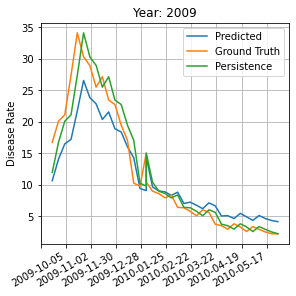

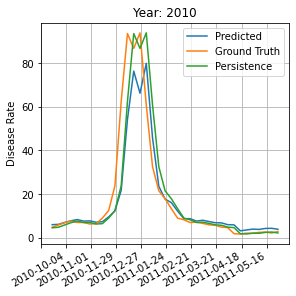

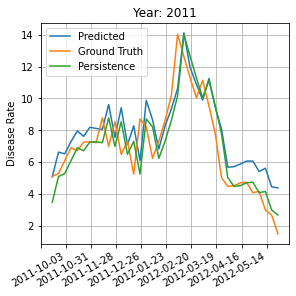

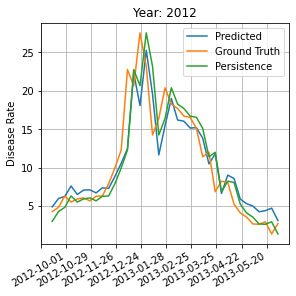

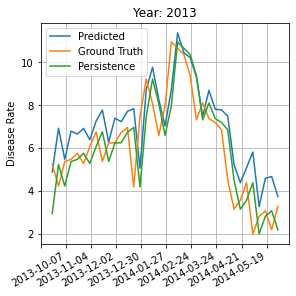

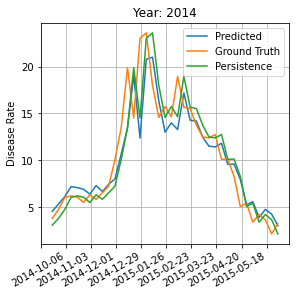

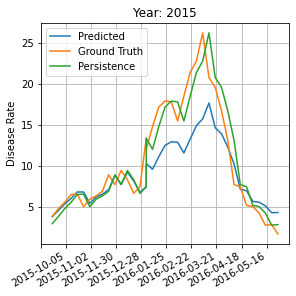

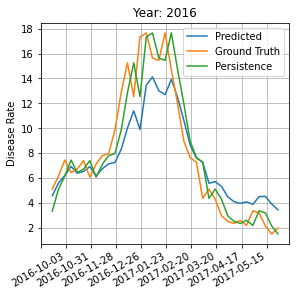

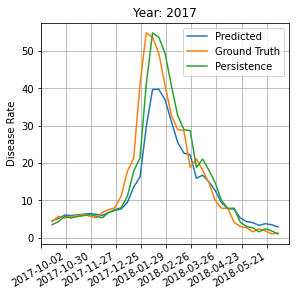

In [15]:
plot_graphs(pred_df)

In [16]:
mse_2wk, pred_2wk = elasticNet_forecast(df,2, coef, predicteds)
mse_df["ILI Rates 2 Week Forecast"]=mse_2wk
mse_df

C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Disease Rate"] = new_df["Disease Rate"].shift(shift)
C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  new_df.dropna(0, inplace = True)
C:\Users\xiean\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\xiean\AppData\Local\Temp/ipykernel_780

,year,ILI Rates,ILI Rates 2 Week Forecast
0,2009,312.422923,668.083069
1,2010,83.756399,255.219866
2,2011,13.375711,22.456725
3,2012,6.434165,13.893140
4,2013,4.988186,7.571346
5,2014,5.870991,11.761019
6,2015,2.992766,5.623994
7,2016,12.561321,45.794173
8,2017,17.533168,68.674143
9,2018,22.672072,40.693141


In [17]:
pred_df_2 = create_pred_df(df, pred_2wk, 2)
pred_df_2

,year week,year,week,Disease Rate,Predicted Values
261,2009-01-05,2009,1,21.271921,20.298708
262,2009-01-12,2009,2,12.543404,17.965820
263,2009-01-19,2009,3,8.163241,12.465525
264,2009-01-26,2009,4,6.474453,7.953813
265,2009-02-02,2009,5,6.113524,5.689736
...,...,...,...,...,...
775,2018-11-19,2018,46,6.175297,3.849436
776,2018-11-26,2018,47,7.382408,4.646636
777,2018-12-03,2018,48,8.012008,4.522589
778,2018-12-10,2018,49,10.447732,5.071407


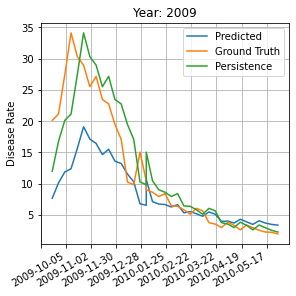

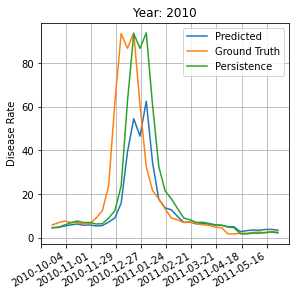

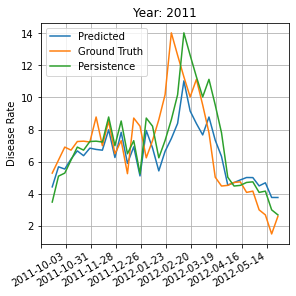

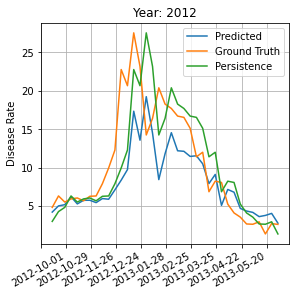

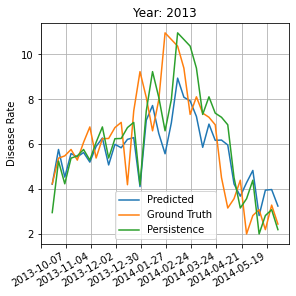

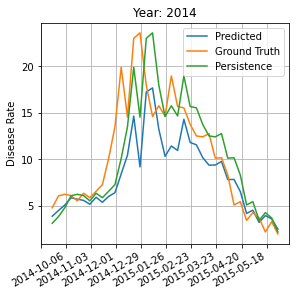

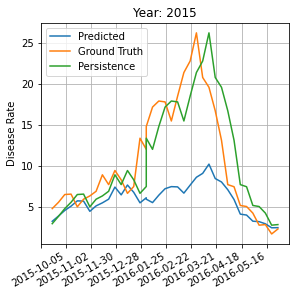

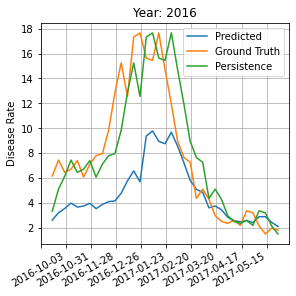

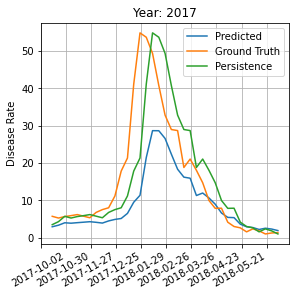

In [18]:
plot_graphs(pred_df_2)

In [19]:
mse_3wk, pred_3wk = elasticNet_forecast(df,3, coef, predicteds, pred_2wk)
mse_df["ILI Rates 3 Week Forecast"]=mse_3wk
mse_df

C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Disease Rate"] = new_df["Disease Rate"].shift(shift)
C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  new_df.dropna(0, inplace = True)
C:\Users\xiean\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\xiean\AppData\Local\Temp/ipykernel_780

,year,ILI Rates,ILI Rates 2 Week Forecast,ILI Rates 3 Week Forecast
0,2009,312.422923,668.083069,828.494436
1,2010,83.756399,255.219866,427.211659
2,2011,13.375711,22.456725,17.251830
3,2012,6.434165,13.893140,28.965774
4,2013,4.988186,7.571346,12.791814
5,2014,5.870991,11.761019,22.978741
6,2015,2.992766,5.623994,11.562941
7,2016,12.561321,45.794173,76.303648
8,2017,17.533168,68.674143,129.719567
9,2018,22.672072,40.693141,48.679845


In [21]:
pred_df_3 = create_pred_df(df,pred_3wk,3)
pred_df_3

,year week,year,week,Disease Rate,Predicted Values
261,2009-01-05,2009,1,12.543404,14.593817
262,2009-01-12,2009,2,8.163241,12.916580
263,2009-01-19,2009,3,6.474453,8.962127
264,2009-01-26,2009,4,6.113524,5.718418
265,2009-02-02,2009,5,5.847066,4.090652
...,...,...,...,...,...
774,2018-11-12,2018,45,6.175297,2.893917
775,2018-11-19,2018,46,7.382408,2.797495
776,2018-11-26,2018,47,8.012008,3.372458
777,2018-12-03,2018,48,10.447732,3.283832


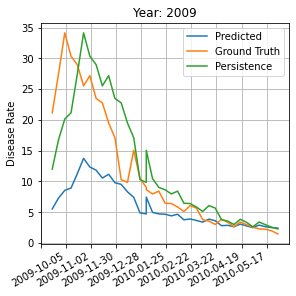

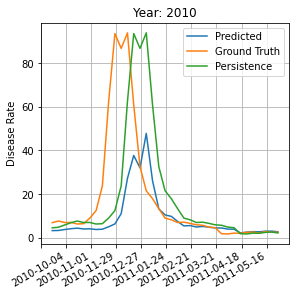

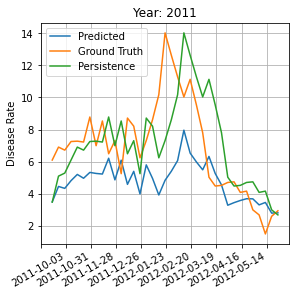

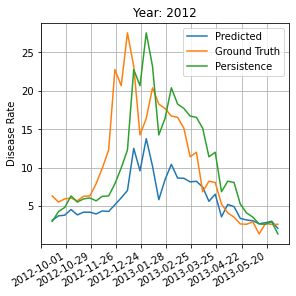

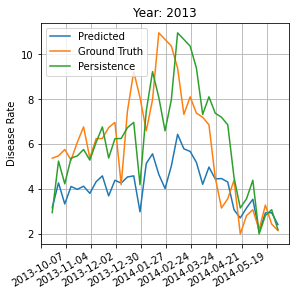

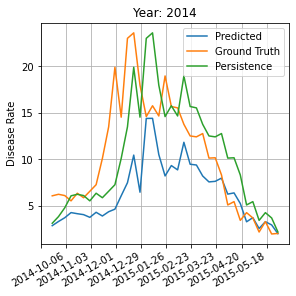

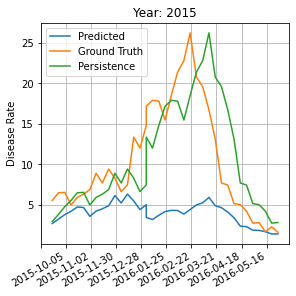

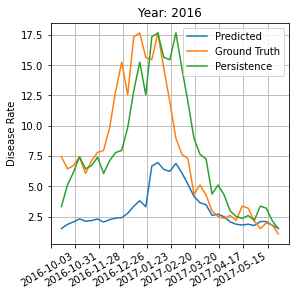

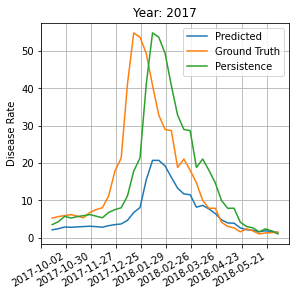

In [22]:
plot_graphs(pred_df_3)

50 threshold with previous 4-week data
mse 2009: 312.5500568846847
mse 2010: 134.08491597189186
mse 2011: 15.332740201455085
mse 2012: 6.55933719903636
mse 2013: 7.100723654319825
mse 2014: 15.429473862538114
mse 2015: 3.478731938735226
mse 2016: 15.922115382817584
mse 2017: 20.696901511179853
mse 2018: 23.664881770207


C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Disease Rate"] = new_df["Disease Rate"].shift(shift)
C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/297504730.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  new_df.dropna(0, inplace = True)
C:\Users\xiean\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\xiean\AppData\Local\Temp/ipykernel_780

C:\Users\xiean\AppData\Local\Temp/ipykernel_7804/2832628452.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)


      Disease Rate -4  Disease Rate -3  Disease Rate -2  Disease Rate -1  \
2009         0.000000         0.000000         0.000000         0.713412   
2010        -0.000000         0.000000        -0.131799         0.872183   
2011        -0.000000         0.000000        -0.178681         0.988743   
2012        -0.005700        -0.000000        -0.201348         0.983120   
2013        -0.009828        -0.000000        -0.185385         0.965703   
2014        -0.022170         0.000000        -0.176799         0.938161   
2015        -0.044698        -0.000000         0.000000         0.867985   
2016         0.000000         0.000000         0.006612         0.544871   
2017         0.000000         0.000000         0.088354         0.551288   
2018         0.000000         0.000000         0.074910         0.614674   

           flu      flue  bronchitis  chest infection     colds  pleurisy  \
2009  0.000348  0.000956   -0.002580         0.000262 -0.001616  0.000000   
2010  0.0

C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.08523710272857, tolerance: 7.65123403316174
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.08523710272857, tolerance: 7.65123403316174
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377.62982207065534, tolerance: 3.4047618203608407
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiean\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

mse 2014: 17.985486833019085
mse 2015: 3.3763503349083077
mse 2016: 15.836243557064567
mse 2017: 21.045626394181014
mse 2018: 24.090362819686632


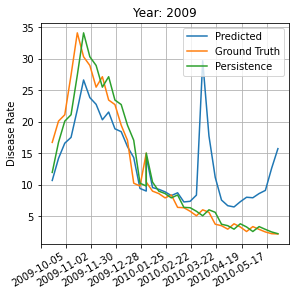

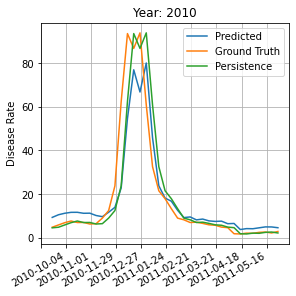

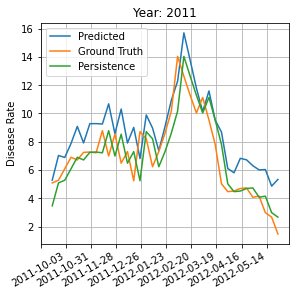

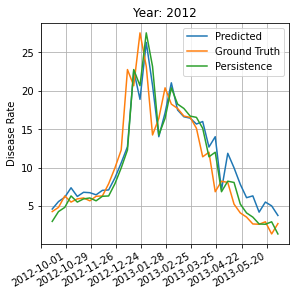

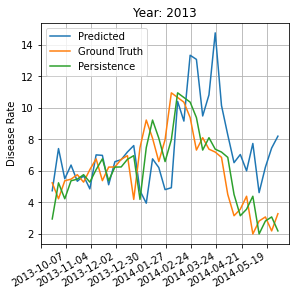

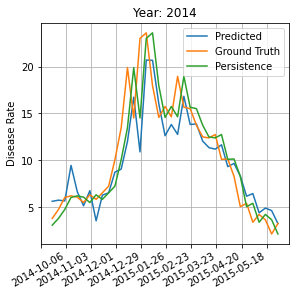

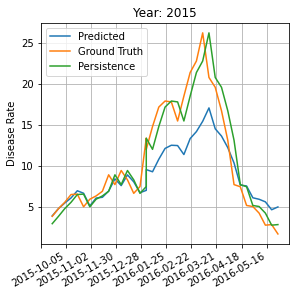

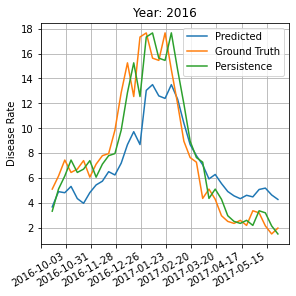

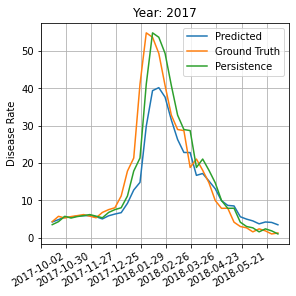

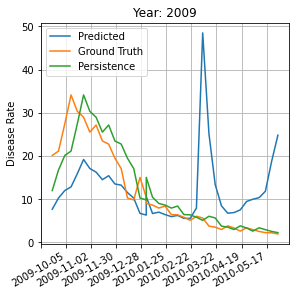

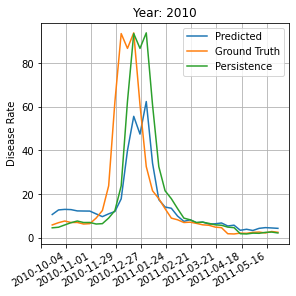

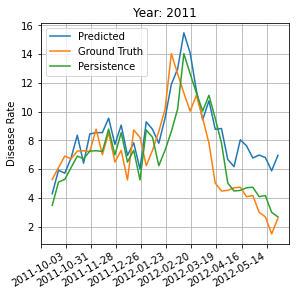

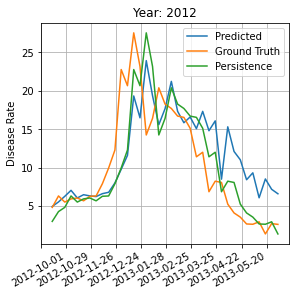

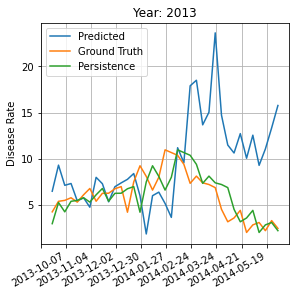

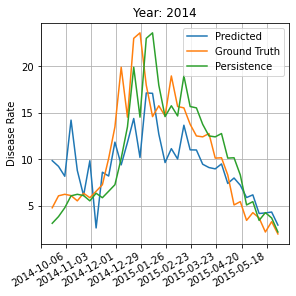

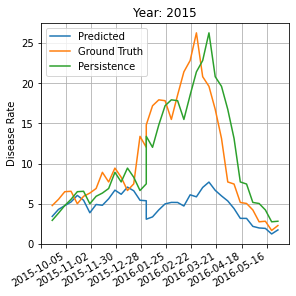

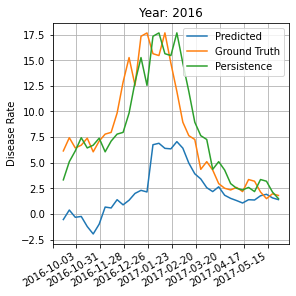

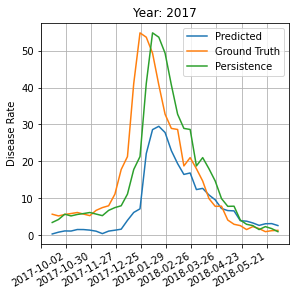

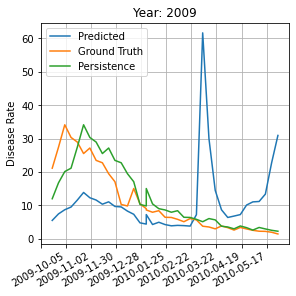

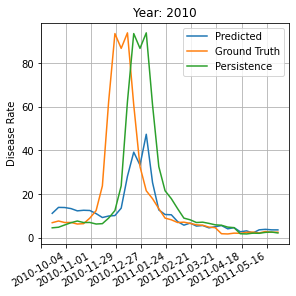

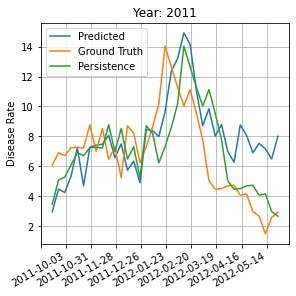

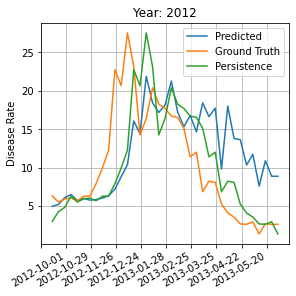

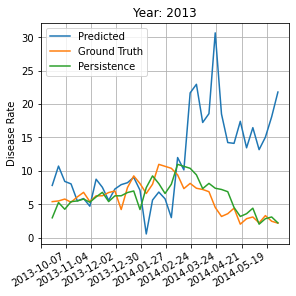

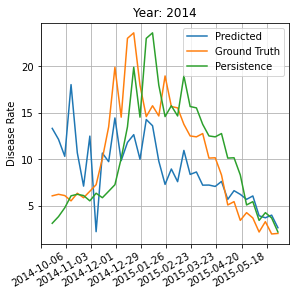

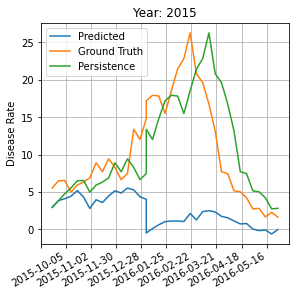

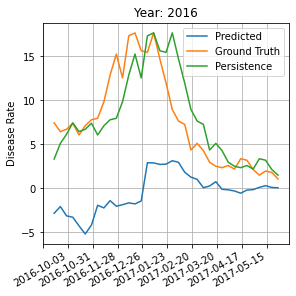

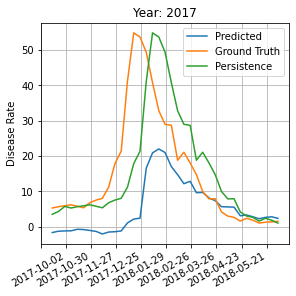

In [23]:
for i in range(50, 450, 50): 
    t_df = pd.read_csv("date_time_threshold_data_frames/{}_zero_terms.csv".format(i))
    d_n_t_df = pd.merge(df, t_df, on=["year week","year","week", "Disease Rate"])
    col = d_n_t_df.pop("Disease Rate")
    d_n_t_df.insert(d_n_t_df.shape[1], col.name, col)
    print("{} threshold with previous 4-week data".format(i))
    mse_list, coef, predicteds = elasticNet(d_n_t_df, min_alpha, min_l1)
    mse_df["ILI Rates Data + {} Threshold".format(i)] = mse_list
    if(i == 50):
        mse_2wk, pred_2wk = elasticNet_forecast(d_n_t_df,2, coef, predicteds)
        mse_df["ILI Rates Data + {} Threshold 2 Week Forecast".format(i)] = mse_2wk
        mse_3wk, pred_3wk = elasticNet_forecast(d_n_t_df,3, coef, predicteds, pred_2wk)
        mse_df["ILI Rates Data + {} Threshold 3 Week Forecast".format(i)] = mse_3wk
        pred_threshold_df = create_pred_df(df,predicteds)
        plot_graphs(pred_threshold_df)
        pred_threshold_df_2 = create_pred_df(df,pred_2wk,2)
        plot_graphs(pred_threshold_df_2)
        pred_threshold_df_3 = create_pred_df(df,pred_3wk,3)
        plot_graphs(pred_threshold_df_3)
        coef_df = pd.DataFrame(data=coef, columns = d_n_t_df.columns[3:-1], index = d_n_t_df["year"].unique()[5:])
        coef_df.to_csv("ILI Rates Data + {} Threshold Coefficients.csv".format(i))
        print(coef_df)
    

In [24]:
coef_df

,Disease Rate -4,Disease Rate -3,Disease Rate -2,Disease Rate -1,flu,flue,bronchitis,chest infection,colds,pleurisy,sinusitis,tonsilitis
2009,0.000000,0.000000,0.000000,0.713412,0.000348,0.000956,-0.002580,0.000262,-0.001616,0.000000,-0.000000,0.000000
2010,-0.000000,0.000000,-0.131799,0.872183,0.000522,0.000684,-0.005397,0.003815,0.000986,-0.002751,-0.000368,-0.002478
2011,-0.000000,0.000000,-0.178681,0.988743,-0.000055,0.000000,-0.001590,0.005000,0.004560,-0.000000,0.000000,-0.012057
2012,-0.005700,-0.000000,-0.201348,0.983120,-0.000061,0.000753,-0.000000,0.003193,0.011921,-0.000235,0.000104,-0.005956
2013,-0.009828,-0.000000,-0.185385,0.965703,-0.000172,0.004509,0.008721,-0.000000,0.023041,-0.017498,0.000000,-0.004061
2014,-0.022170,0.000000,-0.176799,0.938161,-0.000076,0.001265,-0.000000,-0.013644,0.081448,-0.025157,-0.000000,-0.002214
2015,-0.044698,-0.000000,0.000000,0.867985,-0.000010,-0.000000,0.000000,-0.002859,0.008414,-0.000000,0.000000,-0.004773
2016,0.000000,0.000000,0.006612,0.544871,0.000460,0.000456,-0.001501,-0.000000,-0.000000,-0.010993,-0.004627,-0.000000
2017,0.000000,0.000000,0.088354,0.551288,0.000187,-0.003184,-0.006004,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2018,0.000000,0.000000,0.074910,0.614674,-0.001000,-0.001444,-0.000000,0.005978,-0.000000,-0.001864,0.000000,-0.000000


In [25]:
mse_df

,year,ILI Rates,ILI Rates 2 Week Forecast,ILI Rates 3 Week Forecast,ILI Rates Data + 50 Threshold,ILI Rates Data + 50 Threshold 2 Week Forecast,ILI Rates Data + 50 Threshold 3 Week Forecast,ILI Rates Data + 100 Threshold,ILI Rates Data + 150 Threshold,ILI Rates Data + 200 Threshold,ILI Rates Data + 250 Threshold,ILI Rates Data + 300 Threshold,ILI Rates Data + 350 Threshold,ILI Rates Data + 400 Threshold
0,2009,312.422923,668.083069,828.494436,312.550057,667.485582,827.160862,312.553101,313.697839,316.258972,316.259626,316.481206,316.481206,321.663197
1,2010,83.756399,255.219866,427.211659,134.084916,389.945032,636.172246,150.769737,163.100286,312.250703,388.418771,402.275574,400.187966,514.925501
2,2011,13.375711,22.456725,17.251830,15.332740,22.905340,16.156561,15.765695,19.813483,26.156493,25.118905,35.809835,35.856670,37.559603
3,2012,6.434165,13.893140,28.965774,6.559337,13.067422,22.344749,6.958577,7.030105,7.452028,8.219745,11.347964,11.377021,12.015495
4,2013,4.988186,7.571346,12.791814,7.100724,21.593216,36.895749,8.037951,8.140298,8.078524,7.708325,7.638077,7.866625,8.585943
5,2014,5.870991,11.761019,22.978741,15.429474,59.142548,117.562248,15.636908,17.587686,17.592328,16.676571,17.466276,17.662129,17.985487
6,2015,2.992766,5.623994,11.562941,3.478732,7.045089,14.388401,3.665925,3.827927,3.832374,3.832373,3.800772,3.455570,3.376350
7,2016,12.561321,45.794173,76.303648,15.922115,76.702212,135.396684,15.922131,15.836531,15.836247,15.836189,15.836305,15.836237,15.836244
8,2017,17.533168,68.674143,129.719567,20.696902,93.604833,183.258693,20.834637,21.078760,21.077086,21.077086,21.077086,21.045625,21.045626
9,2018,22.672072,40.693141,48.679845,23.664882,40.743002,48.625779,23.631509,23.631548,23.729837,23.729837,24.090363,24.090363,24.090363
